In [17]:
import pandas as pd
import numpy as np
from joblib import dump, load

import string, os, random
import calendar

from functools import reduce

import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#from matplotlib.patches import Circle
#from matplotlib.lines import Line2D

import plotly.graph_objs as go
from plotly import tools
import plotly.express as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [159]:
"""
notebook: 1.1-simmler-data-preprocessing_accidents_severity_visualize
---------------------------------------------------------------------
explore severity, distribution, cross table, chi-2
"""

'\nnotebook: 1.1-simmler-data-preprocessing_accidents_severity_visualize\n---------------------------------------------------------------------\nexplore severity, distribution, cross table, chi-2\n'

In [2]:
#------------------------------------------------------------------------------------------------
# Import joblib file with 2019-2024 preprocessed data for accidents
#------------------------------------------------------------------------------------------------
#df_acc_severity = load(r'..\..\data\processed\2_preprocessing\1.1-simmler-data-preprocessing_accidents_severity.joblib')
df_acc_severity = load(r'..\..\data\processed\2_preprocessing\1.1-simmler-data-preprocessing_accidents_severity_reordered.joblib')

display(df_acc_severity.head(3))
df_acc_severity.info()


,acc_num,acc_date,acc_year,acc_month,acc_hour,acc_department,acc_municipality,acc_metro,acc_long,acc_lat,acc_ambient_lightning,acc_atmosphere,acc_urbanization_level,acc_intersection,acc_collision_type,ind_num_veh,ind_severity
0,201900000001,2019-11-30,2019,11,1,93,93053,1,2.47012,48.89621,4.0,1.0,1,1.0,2.0,B01,2
2,201900000001,2019-11-30,2019,11,1,93,93053,1,2.47012,48.89621,4.0,1.0,1,1.0,2.0,A01,1
3,201900000002,2019-11-30,2019,11,2,93,93066,1,2.36880,48.93070,3.0,1.0,1,1.0,6.0,A01,2


<class 'pandas.core.frame.DataFrame'>
Index: 651785 entries, 0 to 125186
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   acc_num                 651785 non-null  int64         
 1   acc_date                651785 non-null  datetime64[ns]
 2   acc_year                651785 non-null  int64         
 3   acc_month               651785 non-null  int64         
 4   acc_hour                651785 non-null  int64         
 5   acc_department          651785 non-null  object        
 6   acc_municipality        651785 non-null  object        
 7   acc_metro               651785 non-null  int64         
 8   acc_long                651785 non-null  float64       
 9   acc_lat                 651785 non-null  float64       
 10  acc_ambient_lightning   651774 non-null  float64       
 11  acc_atmosphere          651747 non-null  float64       
 12  acc_urbanization_level  651785 non-

In [3]:
# -------------------------------------------------------------------------------------------------
# copy file
# -------------------------------------------------------------------------------------------------

df_acc_target = df_acc_severity.copy()
df_acc_target.head()


,acc_num,acc_date,acc_year,acc_month,acc_hour,acc_department,acc_municipality,acc_metro,acc_long,acc_lat,acc_ambient_lightning,acc_atmosphere,acc_urbanization_level,acc_intersection,acc_collision_type,ind_num_veh,ind_severity
0,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,B01,2
2,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,A01,1
3,201900000002,2019-11-30,2019,11,2,93,93066,1,2.368800,48.930700,3.0,1.0,1,1.0,6.0,A01,2
4,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0,A01,1
5,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0,A01,2


In [4]:
# -------------------------------------------------------------------------------------------------
# import lib_graph_2
# -------------------------------------------------------------------------------------------------

#colors
plot_color = 'deepskyblue'

colors_grav_org_order = {1: 'green', 2: 'darkred', 3: 'orange', 4: 'yellowgreen'}
colors_grav_reorder = {1: 'green', 2: 'yellowgreen', 3: 'orange', 4: 'darkred'}
colors_grav = colors_grav_org_order

import importlib
import lib_1_0_simmler_data_preprocessing_graph_2 as lib_graph_2

importlib.reload(lib_graph_2)


<module 'lib_1_0_simmler_data_preprocessing_graph_2' from 'C:\\Users\\asimm\\RepoDS4\\SEP25-BDS-Road-Accidents\\notebooks\\2-data-preprocessing\\lib_1_0_simmler_data_preprocessing_graph_2.py'>

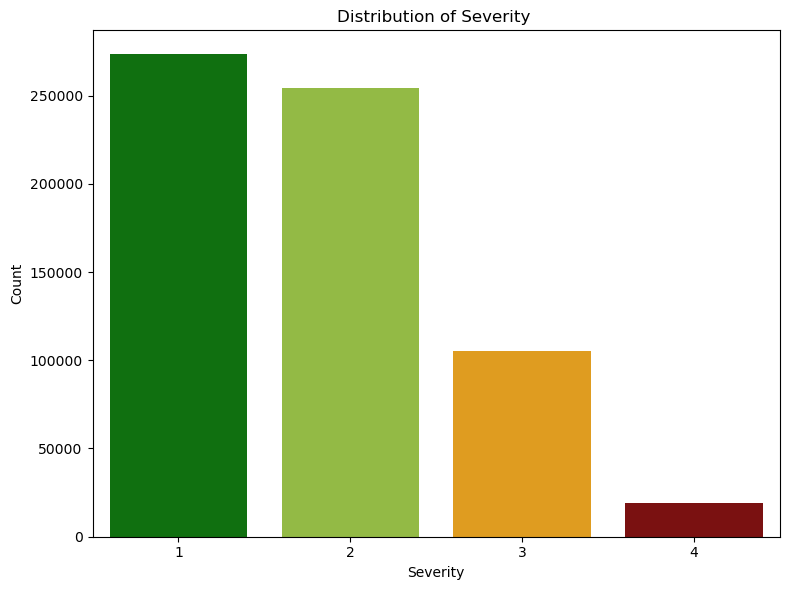

In [5]:
# -------------------------------------------------------------------------------------------------
# show reordered distribution of target variable
#
# the taget variable has an imbalanced distribution
# hospitalized persons and fatalities are much lower
# -------------------------------------------------------------------------------------------------

lib_graph_2.sns_countplot(df_acc_target, 'ind_severity', column_title='Severity', 
                          title='Distribution of Severity', palette_color=colors_grav_reorder)


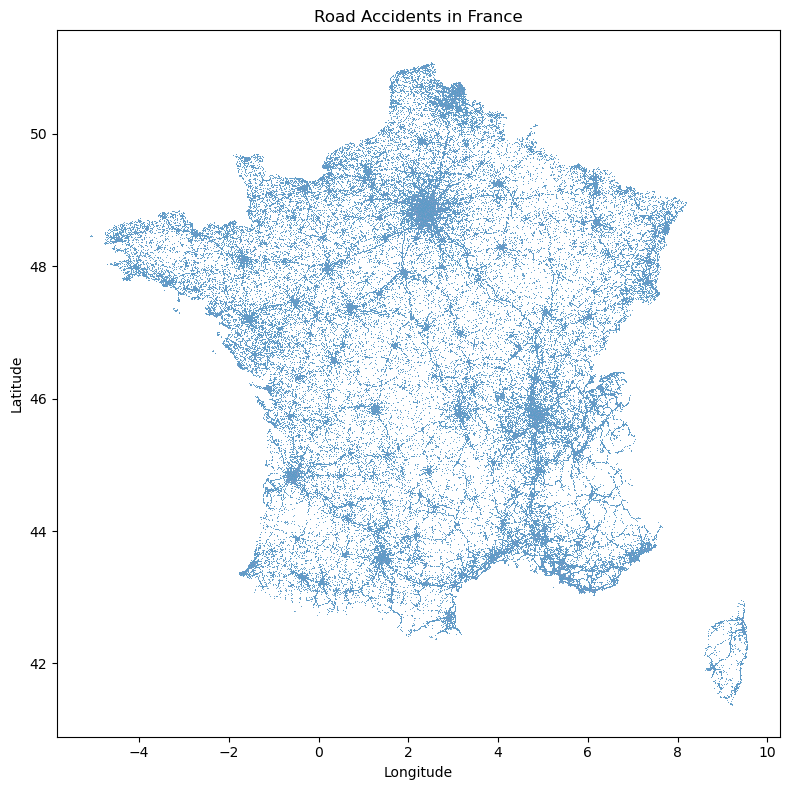

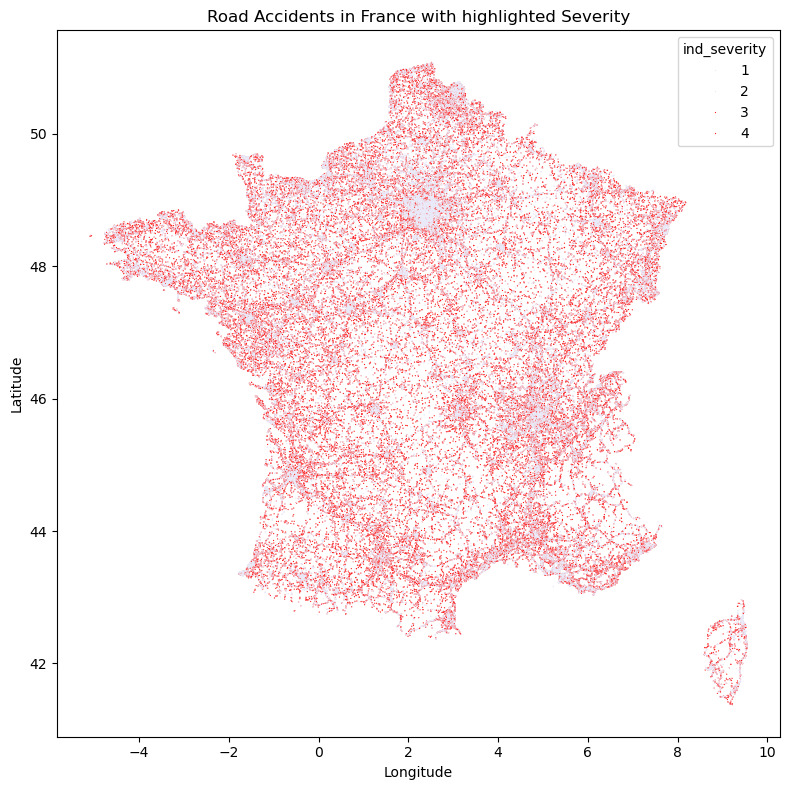

In [6]:
# -------------------------------------------------------------------------------------------------
# Map with accidents in Mainland France
#
# The map shows that accidents with high severity are distributed more evenly across the country
# -------------------------------------------------------------------------------------------------

def show_metro_accidents_map(char):
    
    data = char.loc[char['acc_metro'] == 1]
    
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=data, x='acc_long', y='acc_lat', s=0.5) #0.8 s=0.1 s=0.5
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f"Road Accidents in France") 
    plt.tight_layout()
    plt.show()

def show_metro_accidents_map_severity(char):
    
    data = char.loc[char['acc_metro'] == 1]

    #whitesmoke beige lightcyan lavender azure
    #lightsteelblue dodgerblue deepskyblue darkturquoise deepskyblue cornflowerblue
    colors_grav_map = {1: 'lavender', 2: 'lavender', 3: 'red', 4: 'red'}
    
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=data, x='acc_long', y='acc_lat', hue='ind_severity', 
                    palette=colors_grav_map, s=0.8) #s=0.1 s=0.5
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f"Road Accidents in France with highlighted Severity") 
    plt.tight_layout()
    plt.show()


show_metro_accidents_map(df_acc_target)
show_metro_accidents_map_severity(df_acc_target)


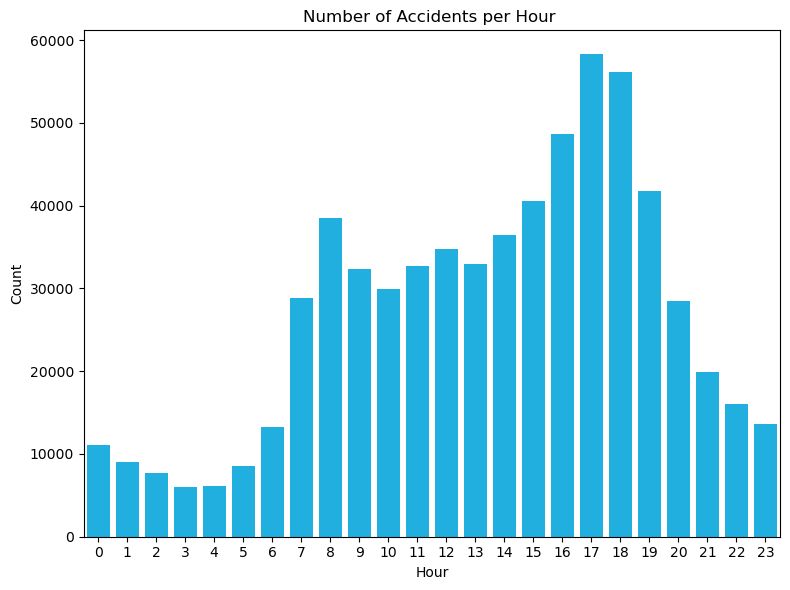

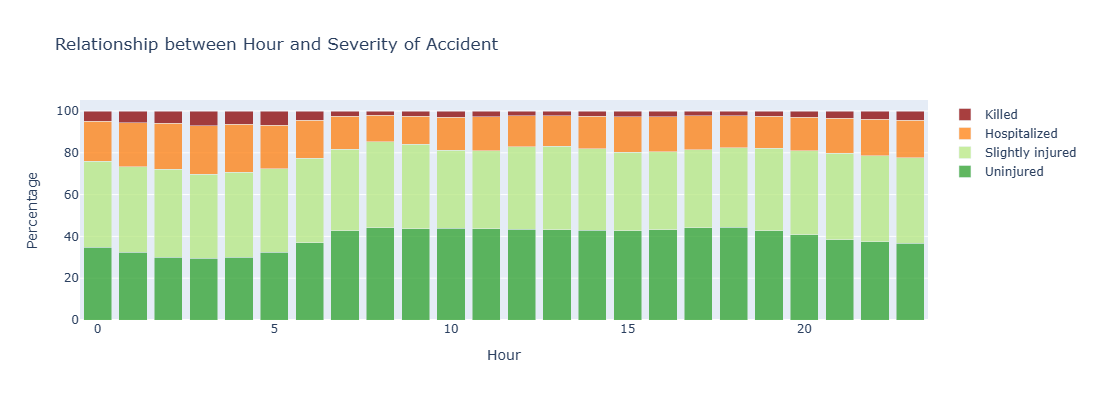

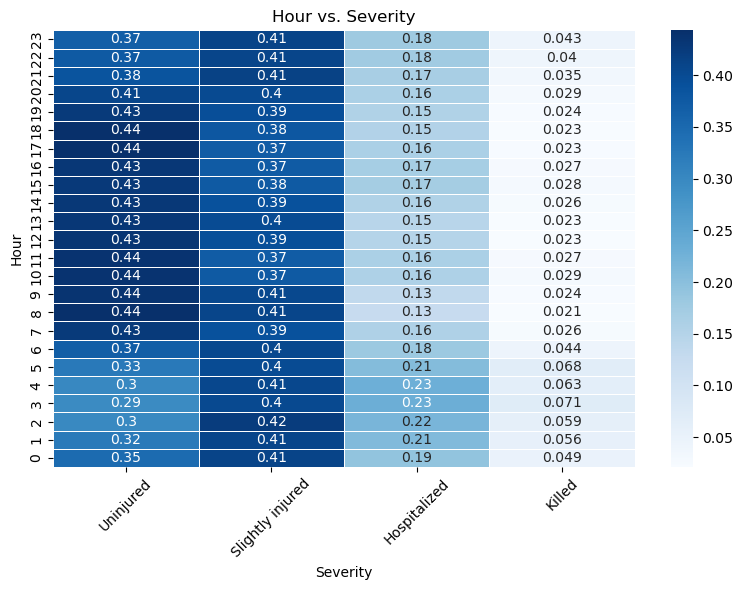

ind_severity,1,2,3,4
acc_hour,,,,
0,0.347572,0.411781,0.191457,0.049191
1,0.324672,0.409006,0.210503,0.055819
2,0.299142,0.422907,0.218799,0.059152
3,0.294984,0.402913,0.231088,0.071015
4,0.301311,0.405738,0.230000,0.062951
5,0.325143,0.398975,0.207523,0.068359
6,0.369163,0.404390,0.182621,0.043826
7,0.426341,0.389997,0.158048,0.025614
8,0.442227,0.410390,0.126254,0.021129


Chi-square Statistic: 0.4430683925481859
P-value: 1.0
H0 is rejected, since the p-value is large.

V Cramer: 0.13587193611206502

V Cramer result is weak.

V-Cramer evaluation:
Weak : Value around 0.1
Medium : Value around 0.3
High : Value around and larger than 0.5


In [7]:
# -------------------------------------------------------------------------------------------------
# Hour vs. Severity
#
# Most accidents happen during daytime, at rush-hour
# But severe accidents are more likely to happen at night, in the early morning
#
# todo: check relationship with light conditions
#
# Chi-square test: H0 should be rejected, since the p-value is large
#
# todo: cramer
# -------------------------------------------------------------------------------------------------

#df_acc_target.info()

importlib.reload(lib_graph_2)

lib_graph_2.sns_countplot(df_acc_target, 'acc_hour', column_title='Hour', title='Number of Accidents per Hour')
lib_graph_2.grav_cat_barplot(df_acc_target, 'acc_hour', 'Hour', list(range(0, 24, 1)))
lib_graph_2.grav_cat_cross_heatmap(df_acc_target, 'acc_hour', 'Hour', 'Hour vs. Severity', yticks=list(range(0, 24, 1)))
lib_graph_2.grav_cat_chi2(df_acc_target, 'acc_hour', cramer=True, cramer_evaluation=True)


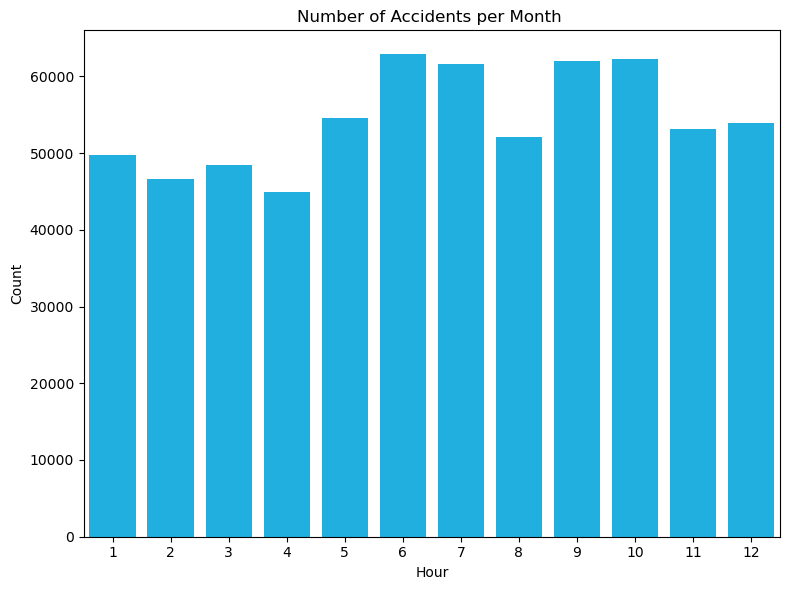

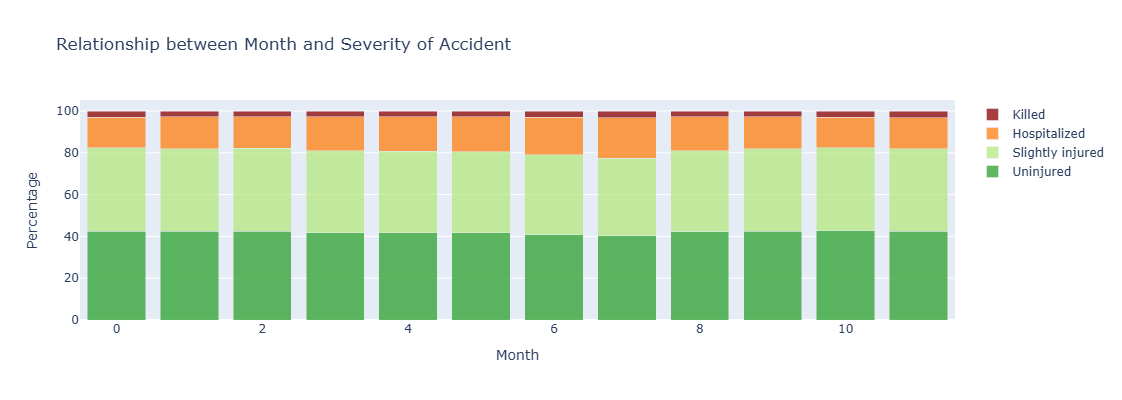

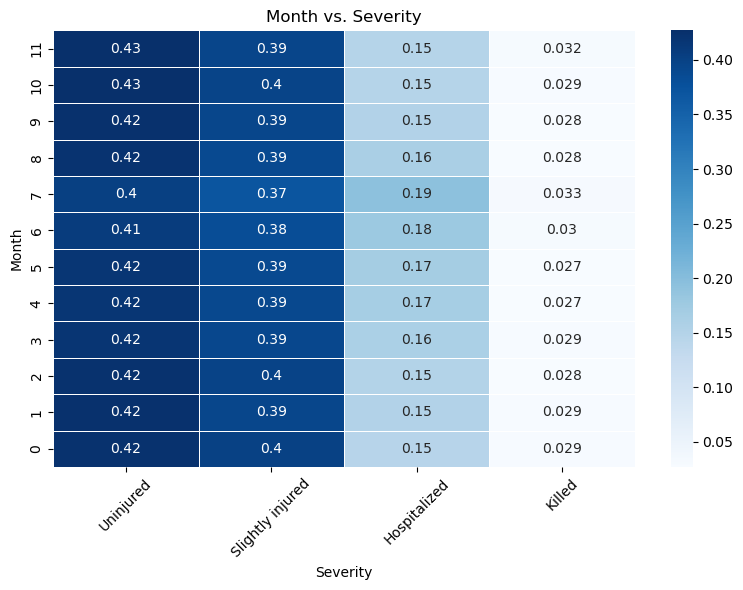

ind_severity,1,2,3,4
acc_month,,,,
1,0.423538,0.400539,0.146626,0.029297
2,0.424593,0.393980,0.152850,0.028576
3,0.423718,0.398108,0.150664,0.027510
4,0.417919,0.392648,0.160755,0.028678
5,0.416398,0.389912,0.166544,0.027146
6,0.417038,0.388047,0.167961,0.026954
7,0.407466,0.382432,0.179739,0.030363
8,0.403606,0.370642,0.193096,0.032657
9,0.421870,0.388390,0.162023,0.027717


Chi-square Statistic: 0.01835532603367976
P-value: 1.0
H0 is rejected, since the p-value is large.

V Cramer: 0.039110235269129316

V Cramer result is very weak.

V-Cramer evaluation:
Weak : Value around 0.1
Medium : Value around 0.3
High : Value around and larger than 0.5


In [10]:
# -------------------------------------------------------------------------------------------------
# Month vs. Severity
#
# Distribution per month and severity class varies only slightly
#
# Chi-square test: H0 should be rejected, since the p-value is large
#
# todo: cramer
# -------------------------------------------------------------------------------------------------

importlib.reload(lib_graph_2)

lib_graph_2.sns_countplot(df_acc_target, 'acc_month', column_title='Hour', title='Number of Accidents per Month')
lib_graph_2.grav_cat_barplot(df_acc_target, 'acc_month', 'Month', list(range(0, 12, 1)))
lib_graph_2.grav_cat_cross_heatmap(df_acc_target, 'acc_month', 'Month', 'Month vs. Severity', yticks=list(range(0, 12, 1)))
lib_graph_2.grav_cat_chi2(df_acc_target, 'acc_month', cramer=True, cramer_evaluation=True)


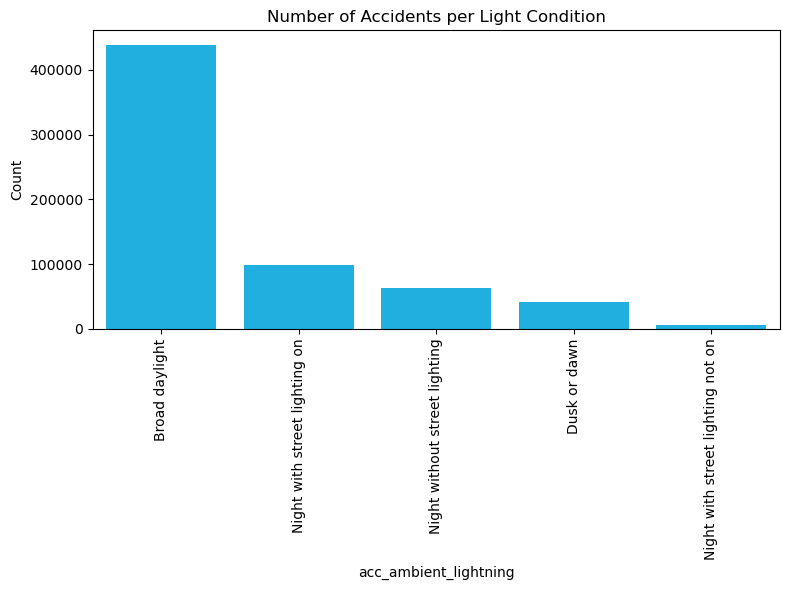

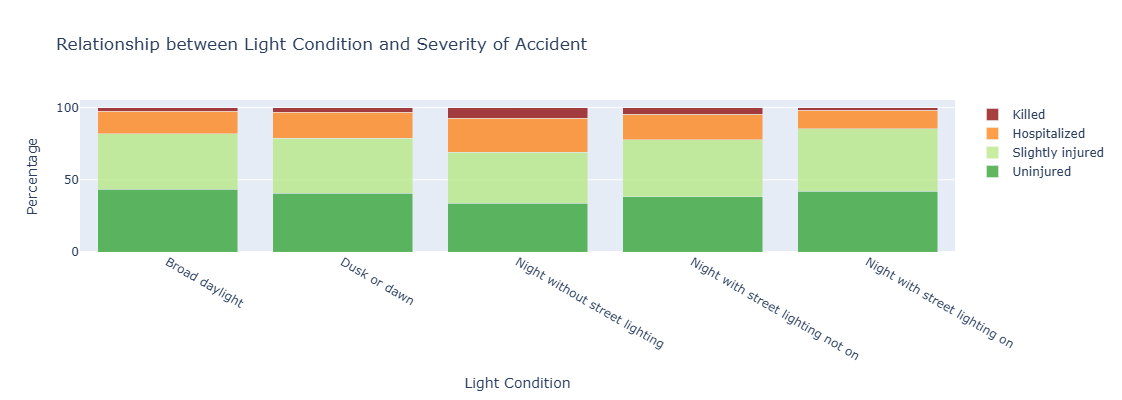

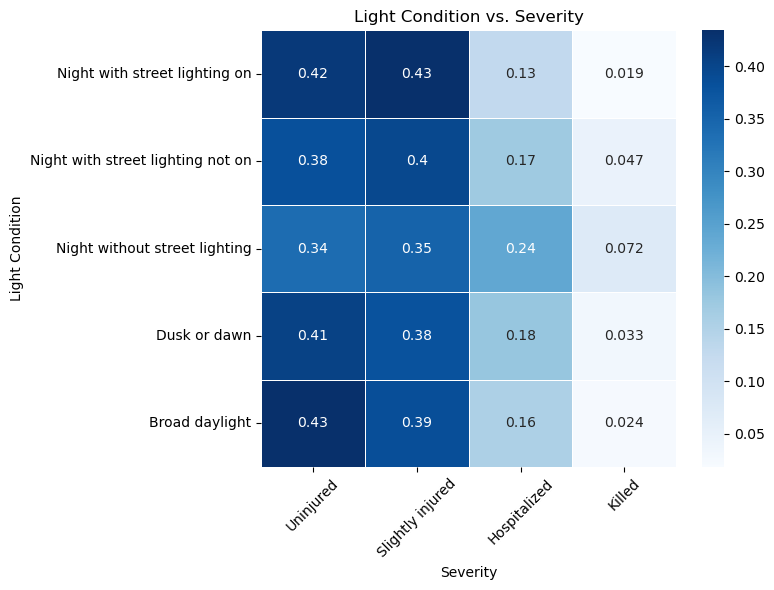

ind_severity,1,2,3,4
acc_ambient_lightning,,,,
1.0,0.432885,0.387022,0.155606,0.024488
2.0,0.405578,0.380770,0.181025,0.032627
3.0,0.337403,0.351846,0.238533,0.072218
4.0,0.382629,0.396447,0.173877,0.047047
5.0,0.419166,0.434433,0.127891,0.018510


Chi-square Statistic: 0.108508559021429
P-value: 0.9999999999661869
H0 is rejected, since the p-value is large.

V Cramer: 0.14731500875432144

V Cramer result is weak.

V-Cramer evaluation:
Weak : Value around 0.1
Medium : Value around 0.3
High : Value around and larger than 0.5


In [11]:
# -------------------------------------------------------------------------------------------------
# Light Condition vs. Severity
#
# Most accidents happen during daytime
# But severe accidents are more likely to happen at night with no street lights on
#
# Chi-square test: H0 should be rejected, since the p-value is large
#
# todo: cramer
# -------------------------------------------------------------------------------------------------

#df_acc_target.info()

importlib.reload(lib_graph_2)

char_lum_labels = {1:'Broad daylight',
                   2:'Dusk or dawn',
                   3:'Night without street lighting',
                   4:'Night with street lighting not on',
                   5:'Night with street lighting on'}

lum_labels = ['Broad daylight','Dusk or dawn','Night without street lighting', 
              'Night with street lighting not on','Night with street lighting on']

#lib_graph_2.sns_countplot_labels(df_acc_target, 'acc_ambient_lightning', char_lum_labels, rotation=90)
lib_graph_2.sns_countplot_labels_2(df_acc_target, 'acc_ambient_lightning', 'Light Condition', char_lum_labels, rotation=90)
lib_graph_2.grav_cat_barplot(df_acc_target, 'acc_ambient_lightning', 'Light Condition', lum_labels)
lib_graph_2.grav_cat_cross_heatmap(df_acc_target, 'acc_ambient_lightning', 'Light Condition', 'Light Condition vs. Severity', yticks=lum_labels)
lib_graph_2.grav_cat_chi2(df_acc_target, 'acc_ambient_lightning', cramer=True, cramer_evaluation=True)


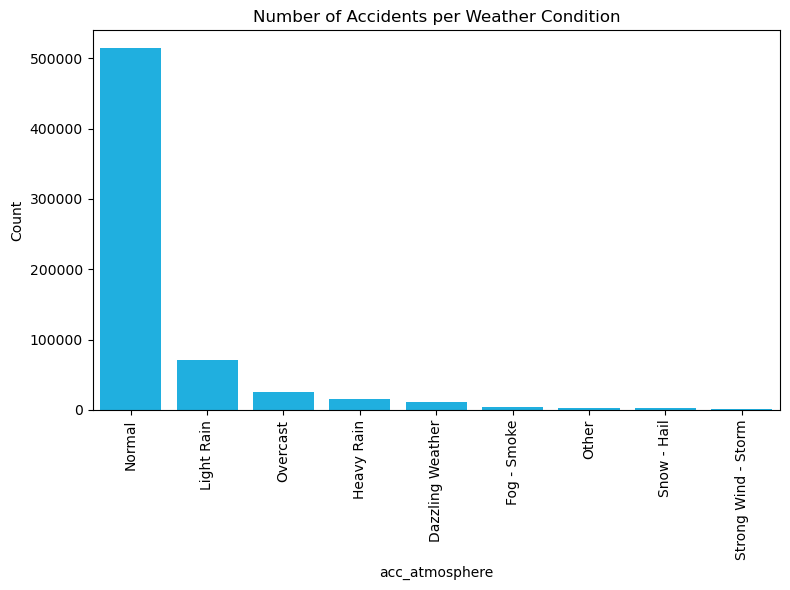

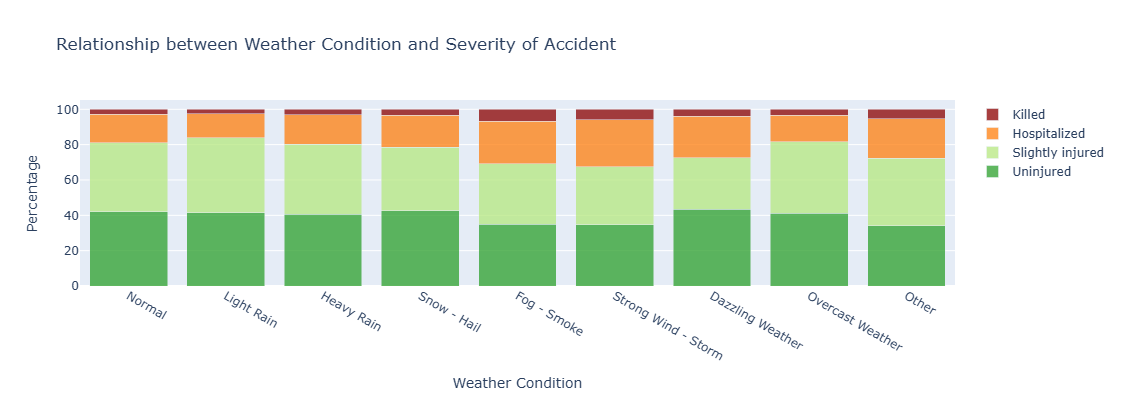

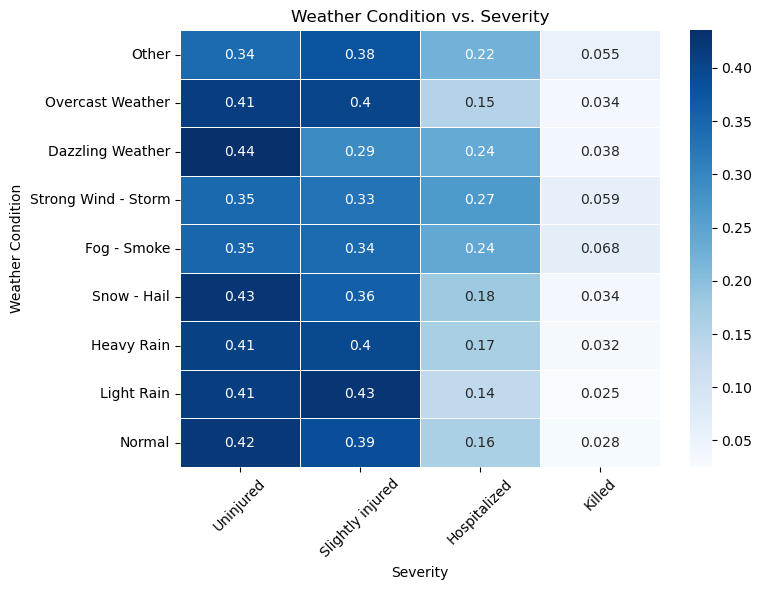

ind_severity,1,2,3,4
acc_atmosphere,,,,
1.0,0.421616,0.387960,0.162088,0.028336
2.0,0.414222,0.425649,0.135038,0.025091
3.0,0.406953,0.395276,0.165677,0.032094
4.0,0.427097,0.359354,0.179453,0.034096
5.0,0.348773,0.342123,0.240770,0.068333
6.0,0.346893,0.328249,0.266102,0.058757
7.0,0.435201,0.289424,0.237057,0.038317
8.0,0.412144,0.402919,0.151258,0.033679
9.0,0.341066,0.380573,0.223632,0.054730


Chi-square Statistic: 0.20180719189970717
P-value: 1.0
H0 is rejected, since the p-value is large.

V Cramer: 0.149743184560065

V Cramer result is weak.

V-Cramer evaluation:
Weak : Value around 0.1
Medium : Value around 0.3
High : Value around and larger than 0.5


In [12]:
# -------------------------------------------------------------------------------------------------
# Weather Conditions vs. Severty
#
# Most accidents happen at normal weather conditions
# However, distribution of accidents with high severity pick up during fog and strong winds
#
# Chi-square test: H0 should be rejected, since the p-value is large
#
# todo: cramer
# -------------------------------------------------------------------------------------------------

importlib.reload(lib_graph_2)

#acc_ind-1:'Not Specified', #todo: -1
char_atm_labels = {1:'Normal',
                   2:'Light Rain',
                   3:'Heavy Rain',
                   4:'Snow - Hail',
                   5:'Fog - Smoke',
                   6:'Strong Wind - Storm',
                   7:'Dazzling Weather',
                   8:'Overcast',
                   9:'Other'
                  }

atm_labels = ['Normal', 'Light Rain', 'Heavy Rain', 'Snow - Hail', 'Fog - Smoke', 
              'Strong Wind - Storm', 'Dazzling Weather', 'Overcast Weather', 'Other']

#lib_graph_2.sns_countplot_labels(df_acc_target, 'acc_atmosphere', char_atm_labels, rotation=90)
lib_graph_2.sns_countplot_labels_2(df_acc_target, 'acc_atmosphere', 'Weather Condition', char_atm_labels, rotation=90)
lib_graph_2.grav_cat_barplot(df_acc_target, 'acc_atmosphere', 'Weather Condition', atm_labels)
lib_graph_2.grav_cat_cross_heatmap(df_acc_target, 'acc_atmosphere', 'Weather Condition', 'Weather Condition vs. Severity', yticks=atm_labels)
lib_graph_2.grav_cat_chi2(df_acc_target, 'acc_atmosphere', cramer=True, cramer_evaluation=True)


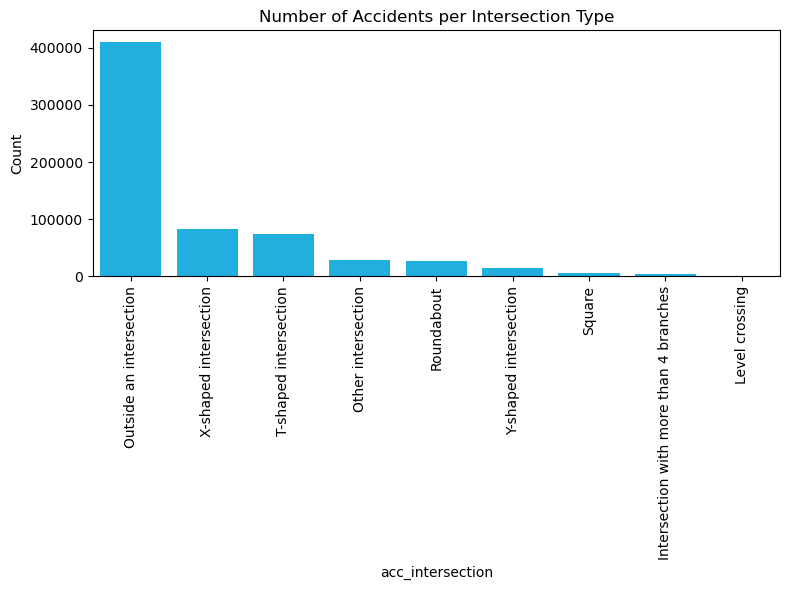

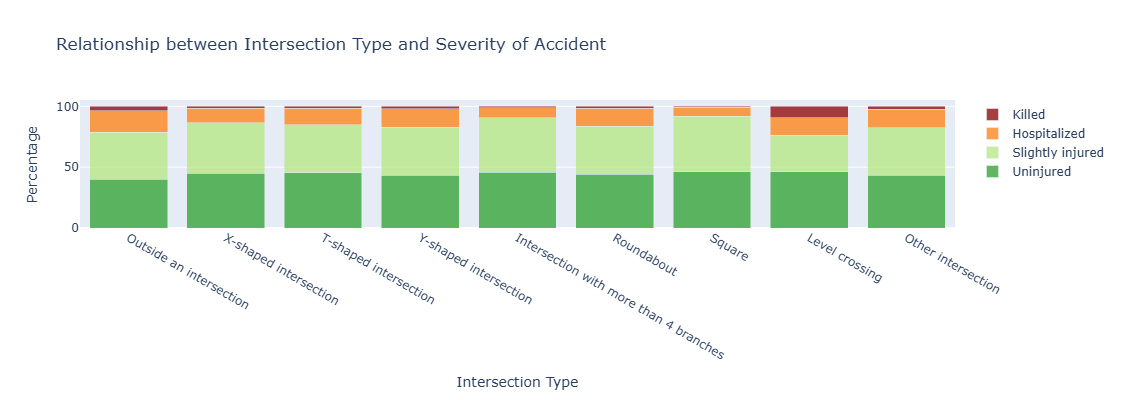

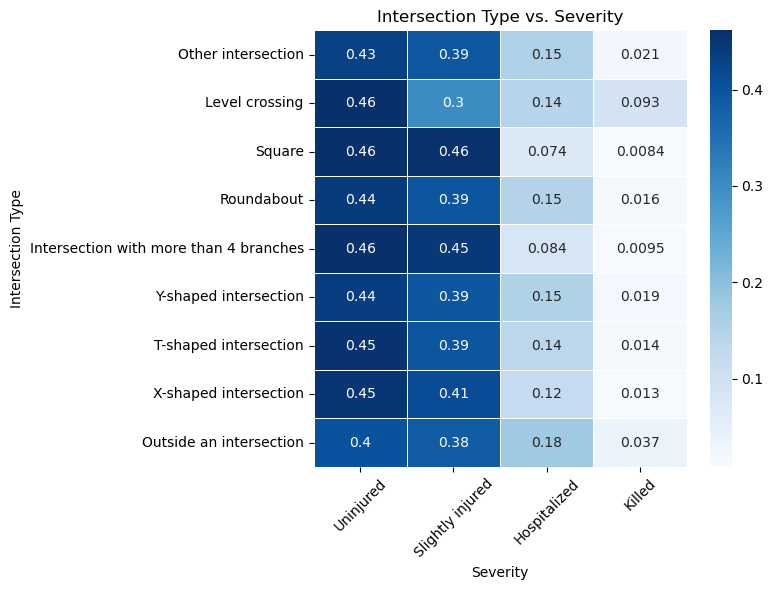

ind_severity,1,2,3,4
acc_intersection,,,,
1.0,0.402224,0.383607,0.177483,0.036686
2.0,0.451938,0.412923,0.121728,0.013411
3.0,0.454865,0.394225,0.136446,0.014464
4.0,0.435087,0.393816,0.151931,0.019166
5.0,0.459831,0.446882,0.083774,0.009514
6.0,0.441463,0.394544,0.147991,0.016002
7.0,0.461421,0.456399,0.073809,0.008370
8.0,0.460756,0.301599,0.144622,0.093023
9.0,0.432822,0.391025,0.154804,0.021349


Chi-square Statistic: 0.3348090058755418
P-value: 1.0
H0 is rejected, since the p-value is large.

V Cramer: 0.1928756092740551

V Cramer result is weak.

V-Cramer evaluation:
Weak : Value around 0.1
Medium : Value around 0.3
High : Value around and larger than 0.5


In [13]:
# -------------------------------------------------------------------------------------------------
# Intersection Type vs. Severity
#
# Most accidents dont happen at intersections
# But severe accidents are most likely to happen at level (railway) crossings
#
# Chi-square test: H0 should be rejected, since the p-value is large
#
# todo: cramer
# -------------------------------------------------------------------------------------------------

#df_acc_target.info()

importlib.reload(lib_graph_2)

#intersection type

char_int_labels = {
    1:'Outside an intersection', 
    2:'X-shaped intersection',
    3:'T-shaped intersection',
    4:'Y-shaped intersection',
    5:'Intersection with more than 4 branches',
    6:'Roundabout',
    7:'Square',
    8:'Level crossing',
    9:'Other intersection'
}
int_labels = [
    'Outside an intersection', 
    'X-shaped intersection',
    'T-shaped intersection',
    'Y-shaped intersection',
    'Intersection with more than 4 branches',
    'Roundabout',
    'Square',
    'Level crossing',
    'Other intersection']

#lib_graph_2.sns_countplot_labels(df_acc_target, 'acc_intersection', char_int_labels, rotation=90)
lib_graph_2.sns_countplot_labels_2(df_acc_target, 'acc_intersection', 'Intersection Type', char_int_labels, rotation=90)
lib_graph_2.grav_cat_barplot(df_acc_target, 'acc_intersection', 'Intersection Type', int_labels)
lib_graph_2.grav_cat_cross_heatmap(df_acc_target, 'acc_intersection', 'Intersection Type', 'Intersection Type vs. Severity', yticks=int_labels)
lib_graph_2.grav_cat_chi2(df_acc_target, 'acc_intersection', cramer=True, cramer_evaluation=True)


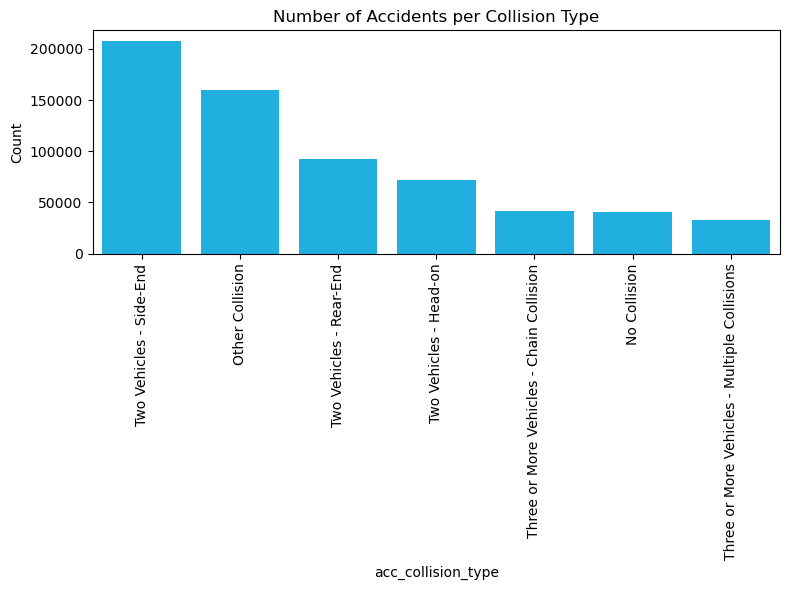

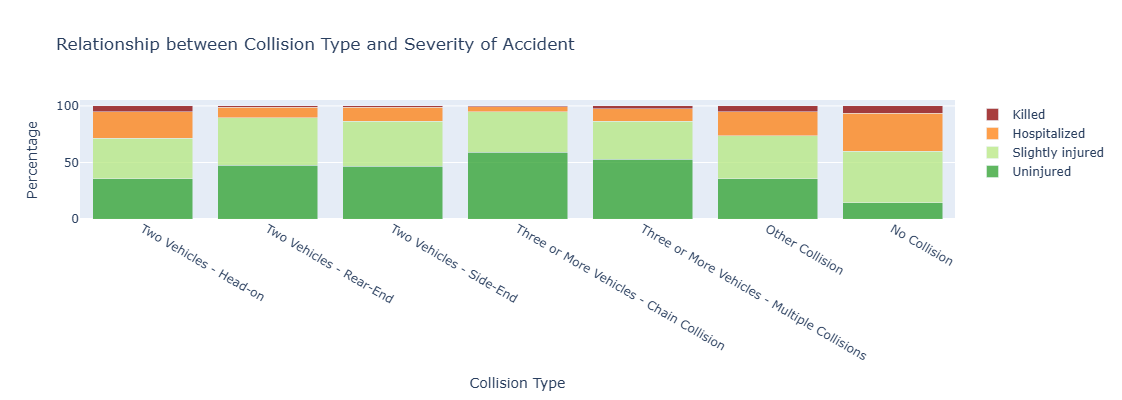

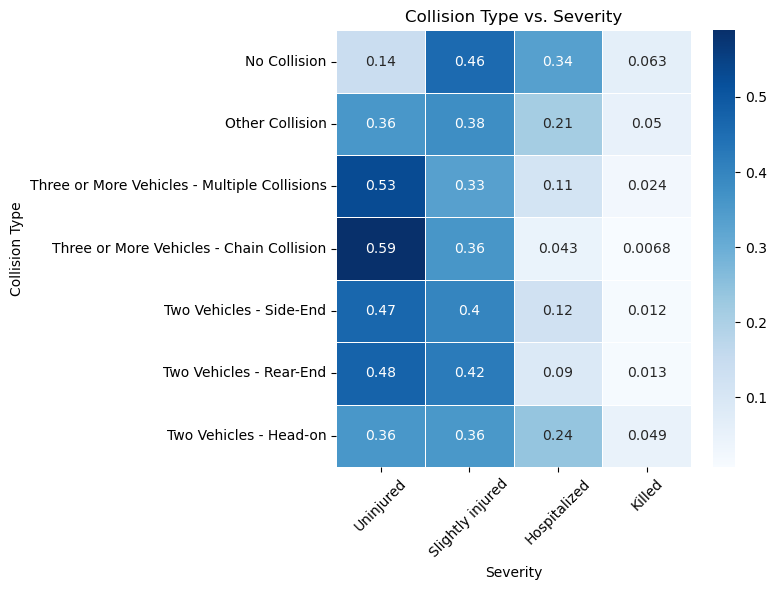

ind_severity,1,2,3,4
acc_collision_type,,,,
1.0,0.357147,0.356123,0.237665,0.049065
2.0,0.475069,0.422637,0.089620,0.012673
3.0,0.465147,0.399452,0.123851,0.011549
4.0,0.588827,0.361151,0.043217,0.006806
5.0,0.529162,0.333523,0.113141,0.024174
6.0,0.358037,0.378193,0.213364,0.050406
7.0,0.142600,0.458730,0.335894,0.062776


Chi-square Statistic: 0.8131334271718318
P-value: 0.99999999941949
H0 is rejected, since the p-value is large.

V Cramer: 0.34082534848130724

V-Cramer result is medium.

V-Cramer evaluation:
Weak : Value around 0.1
Medium : Value around 0.3
High : Value around and larger than 0.5


In [14]:
# -------------------------------------------------------------------------------------------------
# Collision Type vs. Severity
#
# Most accidents involve a Side-End collision
# On the other hand, accidents with a high severity are more likely to happen with types 'Other' and 'no Collision'
#
# Chi-square test: H0 should be rejected, since the p-value is large
#
# todo: cramer
# -------------------------------------------------------------------------------------------------

#df_acc_target.info()

importlib.reload(lib_graph_2)

char_col_labels = {
    #-1:'Not Specified', #q
    1:'Two Vehicles - Head-on', 
    2:'Two Vehicles - Rear-End',
    3:'Two Vehicles - Side-End',
    4:'Three or More Vehicles - Chain Collision',
    5:'Three or More Vehicles - Multiple Collisions',
    6:'Other Collision',
    7:'No Collision'
}

col_labels = [
    #'Not Specified', #q
    'Two Vehicles - Head-on', 
    'Two Vehicles - Rear-End',
    'Two Vehicles - Side-End',
    'Three or More Vehicles - Chain Collision',
    'Three or More Vehicles - Multiple Collisions',
    'Other Collision',
    'No Collision'
]

col_labels_1 = [
    #'Not Specified', #q
    'Two Vehicles - Head-on', 
    'Two Vehicles - Rear-End',
    'Two Vehicles - Side-End',
    'Three or More Vehicles - Chain Collision',
    'Three or More Vehicles - Multiple Collisions',
    'Other Collision',
    'No Collision'
]

#lib_graph_2.sns_countplot_labels(df_acc_target, 'acc_collision_type', char_col_labels, rotation=90)
lib_graph_2.sns_countplot_labels_2(df_acc_target, 'acc_collision_type', 'Collision Type', char_col_labels, rotation=90)

#td: nan/-1 values
cols = df_acc_target[['acc_collision_type', 'ind_severity']]
cols = cols.dropna()
cols = cols[cols['acc_collision_type'] > -1] #td

lib_graph_2.grav_cat_barplot(cols, 'acc_collision_type', 'Collision Type', col_labels_1, exclude_0=False, remove_0=True) #td

lib_graph_2.grav_cat_cross_heatmap(df_acc_target, 'acc_collision_type', 'Collision Type', 'Collision Type vs. Severity', yticks=col_labels)
lib_graph_2.grav_cat_chi2(df_acc_target, 'acc_collision_type', cramer=True, cramer_evaluation=True)


In [15]:
# -------------------------------------------------------------------------------------------------
# Compare Ch2, Cramer values
# -------------------------------------------------------------------------------------------------

importlib.reload(lib_graph_2)

acc_features = ['acc_month', 'acc_hour', 
                'acc_ambient_lightning', 'acc_atmosphere', 'acc_urbanization_level', 
                'acc_intersection', 'acc_collision_type']

df_chi2_cramer = lib_graph_2.df_chi2_cramer(df_acc_target, acc_features, 'ind_severity', show_all=True)
df_chi2_cramer.sort_values(by='v_cramer', ascending=False).reset_index(drop=True)


,feature,chi2_stat,p_value,v_cramer,v_cramer_evaluation
0,acc_collision_type,0.813244,1.000000,0.340849,Medium
1,acc_intersection,0.330745,1.000000,0.191701,Weak
2,acc_urbanization_level,0.064224,0.995754,0.179198,Weak
3,acc_atmosphere,0.203154,1.000000,0.150242,Weak
4,acc_ambient_lightning,0.108825,1.000000,0.147530,Weak
5,acc_hour,0.444023,1.000000,0.136018,Weak
6,acc_month,0.018274,1.000000,0.039023,Below Threshold


In [16]:
# -------------------------------------------------------------------------------------------------
# Todo: correlation between feature variables, -1/nan values, long/lat, departments, zip
# Todo: encoding zip, dep (target) hour (cyclic sin/cos)
# -------------------------------------------------------------------------------------------------

df_acc_target.head()


,acc_num,acc_date,acc_year,acc_month,acc_hour,acc_department,acc_municipality,acc_metro,acc_long,acc_lat,acc_ambient_lightning,acc_atmosphere,acc_urbanization_level,acc_intersection,acc_collision_type,ind_num_veh,ind_severity
0,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,B01,2
2,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,A01,1
3,201900000002,2019-11-30,2019,11,2,93,93066,1,2.368800,48.930700,3.0,1.0,1,1.0,6.0,A01,2
4,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0,A01,1
5,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0,A01,2
